In [1]:
repo_path = '~/repos/forecastNN'

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, repo_path)
from forecastNN.seq2seq import Seq2SeqForecaster
from forecastNN.wavenet import WaveNetForecaster

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

## Generate Data
See: https://github.com/ageron/handson-ml2/blob/master/15_processing_sequences_using_rnns_and_cnns.ipynb

In [4]:
batch_size = 10000
n_steps = 50
pred_steps = 10


def generate_time_series_df(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)  # + noise

    return pd.DataFrame(series[..., np.newaxis].astype(np.float32)[:, :, 0])


df = generate_time_series_df(batch_size, n_steps + pred_steps)

## Build Models

In [5]:
model_seq2seq = Seq2SeqForecaster(10)
model_seq2seq.compile()

model_wave = WaveNetForecaster(10)
model_wave.compile()

## Fit Models

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 11s 1ms/sample - loss: 0.0745 - val_loss: 0.0530
Epoch 2/5
8000/8000 [==============================] - 7s 915us/sample - loss: 0.0447 - val_loss: 0.0395
Epoch 3/5
8000/8000 [==============================] - 7s 922us/sample - loss: 0.0360 - val_loss: 0.0341
Epoch 4/5
8000/8000 [==============================] - 7s 921us/sample - loss: 0.0324 - val_loss: 0.0314
Epoch 5/5
8000/8000 [==============================] - 7s 913us/sample - loss: 0.0304 - val_loss: 0.0297
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 7s 905us/sample - loss: 0.0291 - val_loss: 0.0287
Epoch 2/5
8000/8000 [==============================] - 7s 920us/sample - loss: 0.0282 - val_loss: 0.0275
Epoch 3/5
8000/8000 [==============================] - 7s 916us/sample - loss: 0.0273 - val_loss: 0.0267
Epoch 4/5
8000/8000 [==============================] - 7s 923us/s

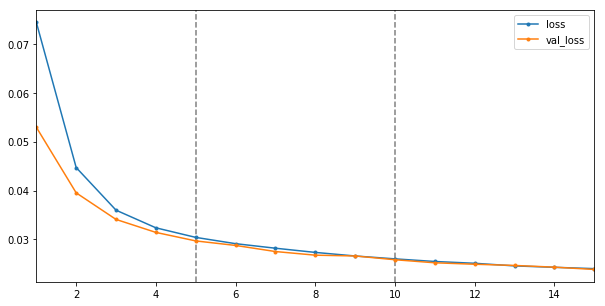

In [6]:
%%time
model_seq2seq.fit_df(df, epochs=5)
model_seq2seq.fit_df(df, epochs=5)
model_seq2seq.fit_df(df, epochs=5)

model_seq2seq.plot_history()

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 4s 531us/sample - loss: 0.0611 - val_loss: 0.0355
Epoch 2/5
8000/8000 [==============================] - 2s 290us/sample - loss: 0.0320 - val_loss: 0.0304
Epoch 3/5
8000/8000 [==============================] - 2s 309us/sample - loss: 0.0279 - val_loss: 0.0267
Epoch 4/5
8000/8000 [==============================] - 2s 290us/sample - loss: 0.0261 - val_loss: 0.0253
Epoch 5/5
8000/8000 [==============================] - 2s 290us/sample - loss: 0.0250 - val_loss: 0.0244
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 2s 291us/sample - loss: 0.0240 - val_loss: 0.0237
Epoch 2/5
8000/8000 [==============================] - 3s 423us/sample - loss: 0.0234 - val_loss: 0.0231
Epoch 3/5
8000/8000 [==============================] - 3s 325us/sample - loss: 0.0229 - val_loss: 0.0225
Epoch 4/5
8000/8000 [==============================] - 2s 302us/

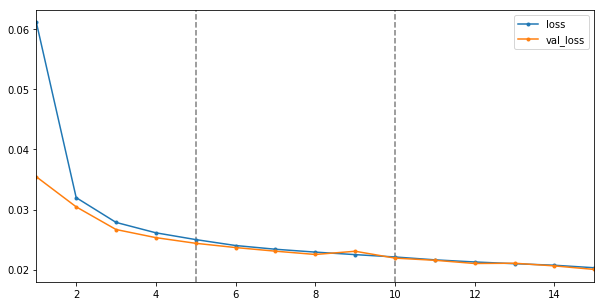

In [7]:
%%time
model_wave.fit_df(df, epochs=5)
model_wave.fit_df(df, epochs=5)
model_wave.fit_df(df, epochs=5)

model_wave.plot_history()

## Predict

In [8]:
test_batch_size = 10

test_df = generate_time_series_df(test_batch_size, n_steps + pred_steps)

In [9]:
%%time
preds_seq2seq = model_seq2seq.predict_df(test_df, last_only=False)

preds_seq2seq.shape

CPU times: user 1.35 s, sys: 9.54 ms, total: 1.36 s
Wall time: 1.35 s


In [10]:
%%time
preds_wave = model_wave.predict_df(test_df, last_only=False)

preds_wave.shape

CPU times: user 449 ms, sys: 6.82 ms, total: 455 ms
Wall time: 452 ms


## Fit Example

Text(0.5, 1.0, 'WaveNet')

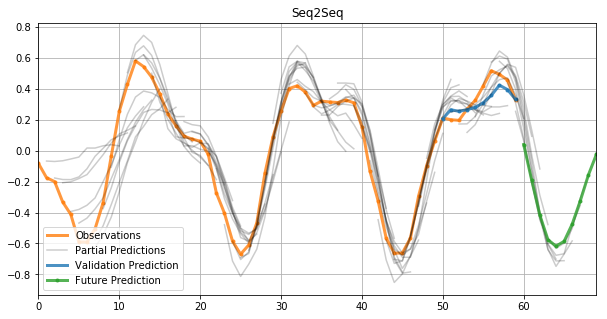

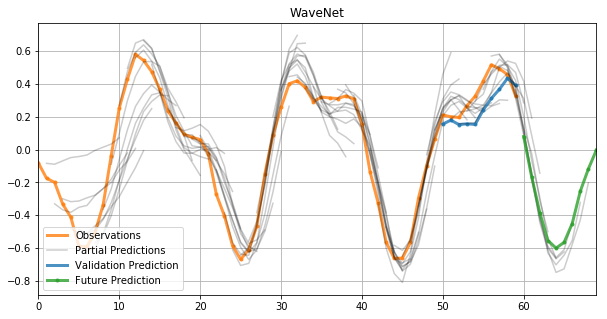

In [11]:
ax_seq2seq = model_seq2seq.plot_example_fit(test_df, loc=0)
ax_seq2seq.set_title('Seq2Seq')

ax_wave = model_wave.plot_example_fit(test_df, loc=0)
ax_wave.set_title('WaveNet')